Practical 5 : Implementation of Convolutional Neural Network on MNIST Dataset.

In [23]:
from keras.datasets import mnist

In [24]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


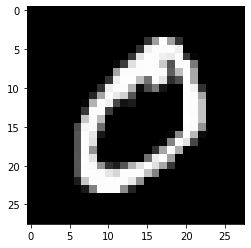

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1,:,:].reshape(28,28),cmap='gray')
plt.show()

In [27]:
y_train[1]

0

In [28]:
#Convert labels in one hot vector
from keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [29]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
# Normalize the images. #Mean centering = > It helps in reducing the likelihood of vanishing gradients during training and can improve the convergence of the network.
x_train_norm = (x_train / 255) - 0.5
x_test_norm = (x_test / 255) - 0.5

In [31]:
print(x_train_norm.shape)
print(x_train[1,1,1],x_train_norm[1,1,1])


(60000, 28, 28)
0 -0.5


In [32]:
x_train_norm.shape[0]

60000

In [33]:
# Flatten the images.
#x_train_images = x_train_norm.reshape((-1, 784))
#x_test_images = x_test_norm.reshape((-1, 784))

# reshape dataset to have a single channel
x_train_images = x_train_norm.reshape((x_train_norm.shape[0], 28, 28, 1))
x_test_images = x_test_norm.reshape((x_test_norm.shape[0], 28, 28, 1))


In [34]:
print(x_train_images.shape)
print(y_train_encoded.shape)
print(x_test_images.shape)
print(y_test_encoded.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [35]:
#'he_uniform' stands for Kaiming He, a researcher known for his contributions to deep learning. =>the weights are initialized from a uniform distribution.
# he Initialization is designed to work well with activation functions like ReLU (Rectified Linear Unit), 
#which is commonly used in modern neural networks.
#It helps in addressing the vanishing gradient problem associated with ReLU.

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2 )))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [36]:
# compile model
from keras.optimizers import SGD
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_30 (Dense)            (None, 100)             

In [37]:
# Training a model on Train data and at the end it will updates the weights.
eval = model.fit(x_train_images, y_train_encoded, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1171 - accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0407 - accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0278 - accuracy: 0.9915
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0140 - accuracy: 0.9957
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0068 - accuracy: 0.9980
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0046 - accuracy: 0.9987
Epoch 9/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0037 - accuracy: 0.9990
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [ ]:
# Evaluate the model
scores = model.evaluate(x_test_images, y_test_encoded)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.0404 - accuracy: 0.9878

Accuracy: 98.78%


1563/1563 [==============================] - 40s 24ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000


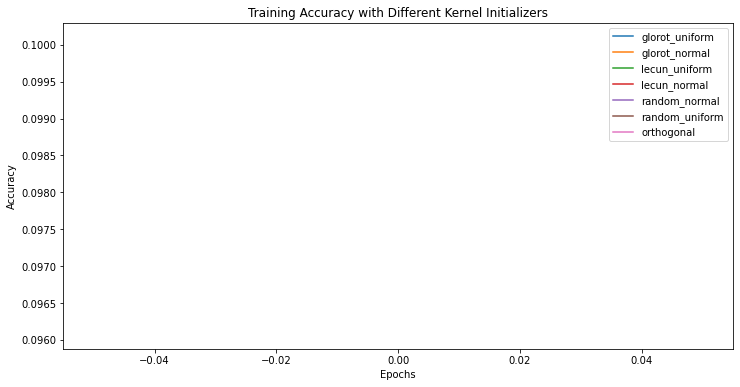

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
#(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a function to create and compile a CNN model with a specified kernel initializer
def create_cnn_model(kernel_initializer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer),
        layers.Flatten(),
        layers.Dense(64, activation='relu', kernel_initializer=kernel_initializer),
        layers.Dense(10, activation='softmax')
    ])
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# List of kernel initializers to experiment with
kernel_initializers = ['glorot_uniform', 'glorot_normal', 'lecun_uniform', 'lecun_normal', 'random_normal', 'random_uniform', 'orthogonal']

# Create and train CNN models with different kernel initializers
history_dict = {}

for kernel_initializer in kernel_initializers:
    model = create_cnn_model(kernel_initializer)
    history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))
    history_dict[kernel_initializer] = history

# Plot training accuracy for different kernel initializers
plt.figure(figsize=(12, 6))
for kernel_initializer, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=kernel_initializer)

plt.title('Training Accuracy with Different Kernel Initializers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [18]:
import tensorflow as tf

# True labels (one-hot encoded)
true_labels = [0, 1, 0]

# Predicted class probabilities
predicted_probs = [0.2, 0.6, 0.2]

# Calculate the Categorical Cross-Entropy loss
loss = tf.keras.losses.categorical_crossentropy(true_labels, predicted_probs)

print(f"Categorical Cross-Entropy Loss: {loss.numpy():.4f}")


Categorical Cross-Entropy Loss: 0.5108
